In [2]:
# 농어 데이터
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 데이터 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트 2차원 배열로 바꾸기

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
# 길이가 50cm인 농어의 무게를 예측하기

print(knr.predict([[50]]))

[1033.33333333]


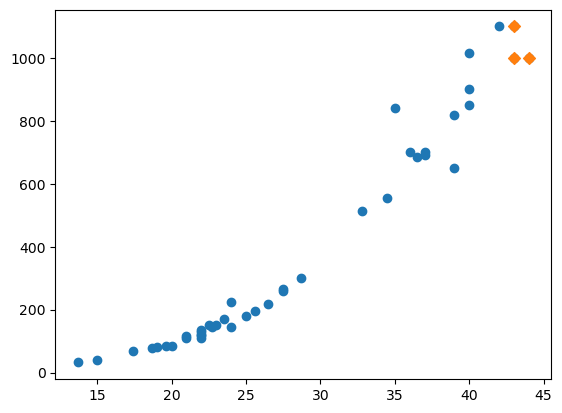

In [7]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 구하기
distance, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터

plt.show()

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균하므로, 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.

In [9]:
print(knr.predict([[100]]))

[1033.33333333]


길이가 100cm인 농어의 무게도 1033g으로 예측한 것을 확인할 수 있다

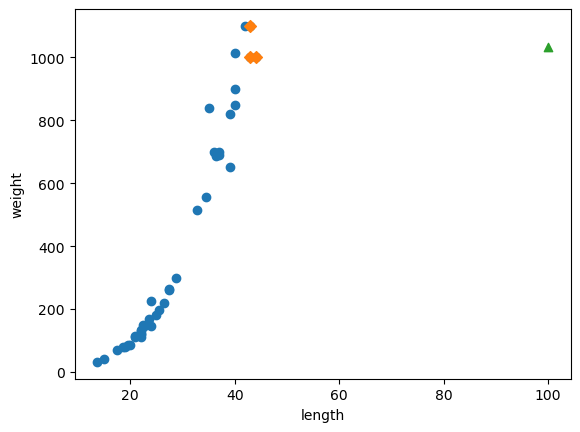

In [10]:
# 100cm 농어의 이웃 구하기
distance, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 농어가 아무리 커드 무게가 더 늘어나지 않음
* k-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포함되도록 훈련 세트를 다시 만들어야 함

## 선형 회귀
* 널리 사용되는 대표적인 회귀 알고리즘
* 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘 중 하나

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측하기
print(lr.predict([[50]]))

[1241.83860323]


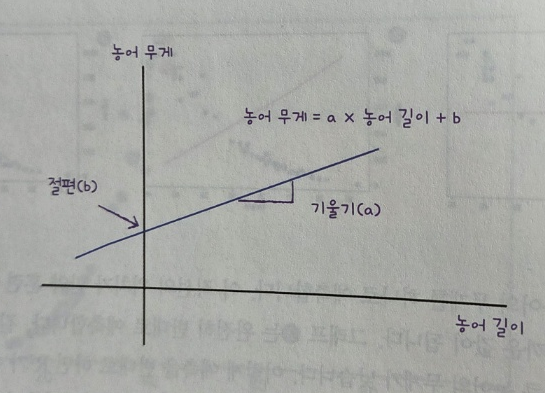

* LinearRegression 클래스가 이 데이터에 가장 잘 맞는 a와 b를 찾은 것이다.
* LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_ 속성에 저장되어 있다.

In [13]:
# coef: 기울기
# intercetp: 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


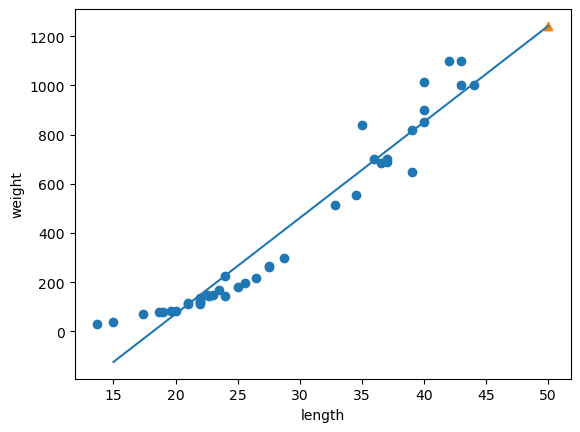

In [15]:
# 농어의 길이 15 ~ 50까지 직선으로 그려보기
# (15, 15 * 39 - 709) 와 (50, 50 * 39 - 709) 두 점을 이으면 된다

plt. scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])


# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


# 다항 회귀
* 다항식을 사용한 선형 회귀를 다항 회귀라고 부른다,
* 데이터가 단순 직선이 아니라 곡선 패턴을 가진다면, 선형 회귀는 한계가 있다
* 다항 회귀를 통해 더 정확한 모델을 만들 수 있음.
* 선형 회귀는 직선: $$ y = ax + b $$

* 다항 회귀는 곡선: $$ y = a_2x^2 + a_1x + a_0 $$

In [17]:
# 넘파이 브로드캐스팅을 통해 제곱 세트를 생성
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [18]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [19]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


선형 회귀 모델보다 더 높은 값을 예측했다

In [20]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01 * 길이$^2$ - 21.6 * 길이 + 116.05

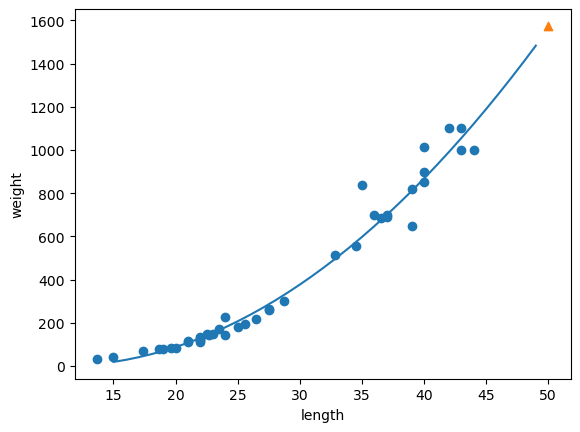

In [21]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기
plt. scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

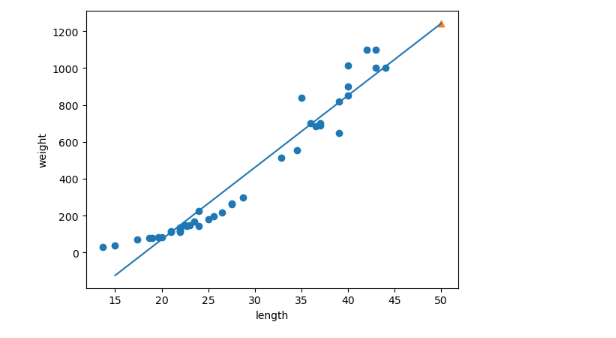

In [22]:
print(lr.score(train_poly, train_target)) # 훈련 세트
print(lr.score(test_poly, test_target)) # 테스트 세트

0.9706807451768623
0.9775935108325122


* 선형회귀 모델보다 훈련, 테스트 세트의 점수가 크게 높아졌다.
* 그러나 테스트 세트의 점수가 아직도 더 높아 과소적합이 남아 있음.
* 더 복잡한 모델이 필요하다!